
## Nombre : German Daniel Rojas
## Universidad Sergio Arboleda
## Programacion Cientifica 

# Taller de Ejercicio Pandas  - Ejericios (Chipotle)  - (Alcohol_comsuption) - 

# (Students_Alcohol_Consumption)

## Seccion 1 - Getting and Knowing your Data

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

df = pd.read_csv(url,'\t') ## \t is a Regular expression (Separate per tabs) 
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 3. Assign it to a variable called chipo

In [3]:
chipo = df

###  Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [5]:
chipo.count()


order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [6]:
print('Size Registers Dataframe Chipo  : {}'.format(chipo.shape[0]))

Size Registers Dataframe Chipo  : 4622


### Step 6. What is the number of columns in the dataset?

In [7]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns

In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [12]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

###  Step 9. Which was the most-ordered item?

In [96]:
df1 = chipo[['quantity','item_name']] ## Selets Columns

df2 = df1.groupby('item_name').sum(); ## Count of number orders
df2.head(10)

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [97]:
countOrderMax = df2.sort_values('quantity',ascending=False).iloc[0];
countOrderMax

quantity    761
Name: Chicken Bowl, dtype: int64

### Step 10. For the most-ordered item, how many items were ordered?

In [98]:
countOrderMax['quantity']

761

### Step 11. What was the most ordered item in the choice_description column?

In [94]:
df11 = chipo[['choice_description','quantity']];
rel =df11.groupby('choice_description').sum().sort_values('quantity',ascending=False).iloc[0];

In [95]:
rel.head()

quantity    159
Name: [Diet Coke], dtype: int64

### Step 12. How many items were orderd in total?

In [101]:
df12 = chipo['quantity'].sum()
print(df12)

4972


### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [106]:
chipo['item_price'].dtype ## Type Object

dtype('O')

In [109]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

#### Step 13.b. Create a lambda function and change the type of item price

In [117]:
chipo.loc[:,'item_price'] =chipo['item_price'].apply(lambda x: float(x[1:-1]))

#### Step 13.c. Check the item price type

In [118]:
chipo['item_price'].dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [121]:
df14 = chipo['quantity'] * chipo['item_price'];

revenue = df14.sum()
print(revenue)

39237.02


### Step 15. How many orders were made in the period?

In [130]:
df15 = chipo['order_id'].value_counts().count()
df15

1834

### Step 16. What is the average revenue amount per order?

In [143]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price'];
df16 = chipo[['order_id','revenue']].groupby('order_id').sum().mean()
df16

revenue    21.394231
dtype: float64

### Step 17. How many different items are sold?

In [146]:
chipo['item_name'].value_counts().count()

50

## Seccion 2 - Filtering and Sorting Data

Algunos items se omiten ya que se repiten y en la seccion anterior fueron resueltos:
ejemplo: Importar el dataset o asignar variables.

###  Step 5. What is the price of each item?

In [167]:
df25 = chipo[chipo['quantity'] == 1]
df25 = df25[['item_name','choice_description','item_price']]
df25.head(10)

,item_name,choice_description,item_price
0,Chips and Fresh Tomato Salsa,NaN,2.39
1,Izze,[Clementine],3.39
2,Nantucket Nectar,[Apple],3.39
3,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,Side of Chips,NaN,1.69
7,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
10,Chips and Guacamole,NaN,4.45


### Step 6. Sort by the name of the item

In [168]:
chipo['item_name'].sort_values()

3389    6 Pack Soft Drink
341     6 Pack Soft Drink
1849    6 Pack Soft Drink
1860    6 Pack Soft Drink
2713    6 Pack Soft Drink
              ...        
2384    Veggie Soft Tacos
781     Veggie Soft Tacos
2851    Veggie Soft Tacos
1699    Veggie Soft Tacos
1395    Veggie Soft Tacos
Name: item_name, Length: 4622, dtype: object

### Step 7. What was the quantity of the most expensive item ordered?

In [178]:
df27 = chipo[['quantity', 'item_price','choice_description','item_name']]
df28  = df27['item_price'].max()
df27.query('item_price == {}'.format(df28))

,quantity,item_price,choice_description,item_name
3598,15,44.25,NaN,Chips and Fresh Tomato Salsa


###  Step 8. How many times was a Veggie Salad Bowl ordered?

In [185]:
chipo.query( "item_name == 'Veggie Salad Bowl'").shape[0]

18

### Step 9. How many times did someone order more than one Canned Soda?

In [190]:
chipo.query("item_name == 'Canned Soda'").query('quantity > 1').shape[0]

20

## Seccion 3  - Grouping

### Step 2. Import the dataset from this address.

In [191]:
data3 = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

### Step 3. Assign it to a variable called drinks.



In [192]:
drinks = data3

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?



In [199]:
df34 = drinks[['continent','beer_servings']].groupby('continent').mean()
df34.sort_values('beer_servings',ascending=False).head(1)

,beer_servings
continent,
EU,193.777778


### Step 5. For each continent print the statistics for wine consumption.

In [206]:
df35 = drinks[['continent','wine_servings']].groupby('continent').describe()
df35

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

### Step 6. Print the mean alcohol consumption per continent for every column

In [209]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [210]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.

In [217]:
df38 = drinks.groupby('continent')['spirit_servings'].describe()

df38[['mean','min','max']]


,mean,min,max
continent,,,
AF,16.339623,0.0,152.0
AS,60.840909,0.0,326.0
EU,132.555556,0.0,373.0
OC,58.437500,0.0,254.0
SA,114.750000,25.0,302.0


## Seccion 4 - Apply

### Step 2. Import the dataset from this address.

In [3]:
data4 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv')

### Step 3. Assign it to a variable called df

In [4]:
df = data4

In [222]:
data4.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Step 4. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [227]:
df = df.loc[:,'school':'guardian']
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


### Step 5. Create a lambda function that will capitalize strings.

In [243]:
cap = lambda x: str(x).capitalize()

### Step 6. Capitalize both Mjob and Fjob

In [245]:
df['Mjob'].apply(cap)
df['Fjob'].apply(cap)

0       Teacher
1         Other
2         Other
3      Services
4         Other
         ...   
390    Services
391    Services
392       Other
393       Other
394     At_home
Name: Fjob, Length: 395, dtype: object

###  Step 7. Print the last elements of the data set

In [246]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father


### Step 8. Did you notice the original dataframe is still lowercase? Why is that? Fix it and capitalize Mjob and Fjob.

In [248]:
df['Mjob'] = df['Mjob'].apply(cap)
df['Fjob'] = df['Fjob'].apply(cap)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father


### Step 9. Create a function called majority that returns a boolean value to a new column called legal_drinker (Consider majority as older than 17 years old)

In [250]:
majority = lambda x: x>17

In [252]:
df['legal_drinker'] = df['age'].apply(majority)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


### Step 10. Multiply every number of the dataset by 10

In [6]:
def multiply(x):
    if(type(x) is int):
        return x*10
    else:
        return x

In [8]:
df.applymap(multiply).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,180,U,GT3,A,40,40,at_home,teacher,...,40,30,40,10,10,30,60,50,60,60
1,GP,F,170,U,GT3,T,10,10,at_home,other,...,50,30,30,10,10,30,40,50,50,60
2,GP,F,150,U,LE3,T,10,10,at_home,other,...,40,30,20,20,30,30,100,70,80,100
3,GP,F,150,U,GT3,T,40,20,health,services,...,30,20,20,10,10,50,20,150,140,150
4,GP,F,160,U,GT3,T,30,30,other,other,...,40,30,20,10,20,50,40,60,100,100


## Seccion 5 - Merge

### Step 2. Import the first dataset cars1 and cars2.

### Step 3. Assign each to a variable called cars1 and cars2

In [10]:
cars1 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv')
cars2 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv')

### Step 4. Oops, it seems our first dataset has some unnamed blank columns, fix cars1

In [14]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [21]:
cars1 = cars1.loc[:,'mpg':'car']
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


### Step 5. What is the number of observations in each dataset?

In [27]:
print("Dataset 1 : ",cars1.shape[0])
print("Dataset 2 : ",cars2.shape[0])

Dataset 1 :  198
Dataset 2 :  200


### Step 6. Join cars1 and cars2 into a single DataFrame called cars

In [32]:
cars = cars1.append(cars2)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


### Step 7. Oops, there is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [41]:
ran = np.random.randint(15000, high = 73000,size = cars.shape[0], dtype='l' )


array([54486, 44132, 44589, 16604, 25710, 55695, 46801, 19388, 72193,
       33568, 20770, 69281, 59126, 46813, 46977, 37156, 16358, 22262,
       28170, 33779, 26212, 56189, 69749, 69502, 20709, 56439, 17343,
       54493, 35190, 65034, 24610, 18749, 30868, 21052, 72265, 53868,
       38701, 15008, 33608, 23216, 26656, 37226, 59297, 59422, 20184,
       69684, 45198, 62196, 53355, 67543, 30480, 62721, 19912, 51551,
       41164, 60388, 46551, 47875, 46122, 33406, 58000, 61571, 29620,
       17715, 52002, 33351, 55923, 65404, 32130, 16754, 60558, 27423,
       48041, 44778, 68721, 30324, 64198, 26894, 51028, 46025, 50956,
       50082, 29229, 39747, 50361, 41609, 39114, 18600, 17578, 15053,
       51317, 71934, 23397, 47962, 38554, 58145, 48989, 30809, 32093,
       65679, 43359, 28676, 71172, 37010, 51607, 63108, 41452, 68076,
       59765, 15219, 23097, 36730, 53358, 68202, 44173, 59552, 33112,
       21657, 61946, 54027, 64150, 51141, 18997, 64422, 20036, 46011,
       70659, 64735,

### Step 8. Add the column owners to cars

In [43]:
cars['owners'] = ran

cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,54486
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,44132
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,44589
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,16604
4,17.0,8,302,140,3449,10.5,70,1,ford torino,25710


### Step 7. Create a histogram of the top 5 items bought?

In [12]:
df2 = chipo[['item_name', 'quantity']]
df2.head()

,item_name,quantity
0,Chips and Fresh Tomato Salsa,1
1,Izze,1
2,Nantucket Nectar,1
3,Chips and Tomatillo-Green Chili Salsa,1
4,Chicken Bowl,2


In [27]:
df3 = df2.groupby('item_name').count()
df4 = df3.sort_values(by=['quantity'],ascending=False).head(5)
df4

,quantity
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


Text(0.5, 1.0, "Most ordered Chipotle's Items")

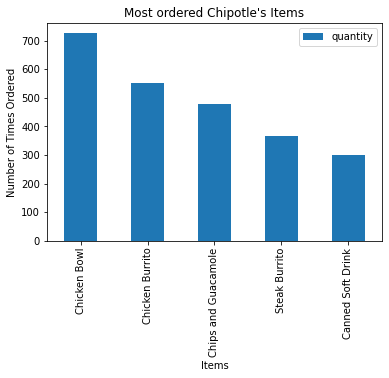

In [35]:
df4.plot(kind='bar')
# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

### Step 6. Create a scatterplot with the number of items ordered per order price

In [107]:
df6 = chipo[['order_id','quantity','item_price']]
df6.loc[:,'item_price'] = df6['item_price'].replace({'\$':''},regex=True).astype(float)

In [109]:
df6.head()



,order_id,quantity,item_price
0,1,1,2.39
1,1,1,3.39
2,1,1,3.39
3,1,1,2.39
4,2,2,16.98


In [112]:
df7 = df6.groupby('order_id').sum()
df7.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


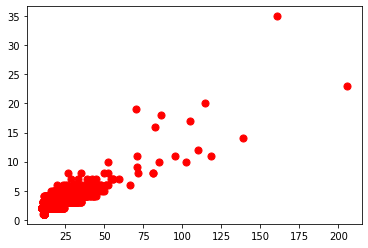

In [148]:
plt.scatter(x = df7['item_price'], y = df7['quantity'],s=50, c='red')